In [14]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import keras
os.environ["KERAS_BACKEND"] = "torch"

In [15]:
df = pd.read_csv('mnist_train.csv')
x_train = df.drop('label', axis=1)
y_train = df['label']

df = pd.read_csv('mnist_test.csv')
x_test = df.drop('label', axis=1)
y_test = df['label']

x_train.head(2)

,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
y_train.head(2)


0    5
1    0
Name: label, dtype: int64

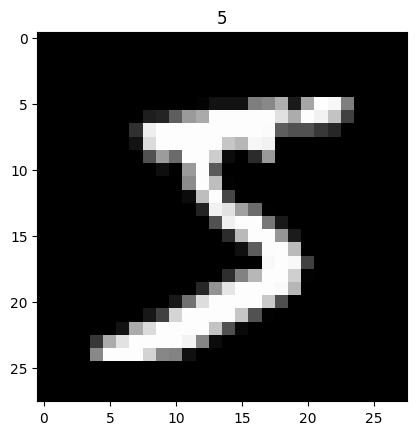

In [7]:
tmp = x_train.values[0].reshape(28, 28)
plt.imshow(tmp, cmap='gray')
plt.title(y_train[0])
plt.show()

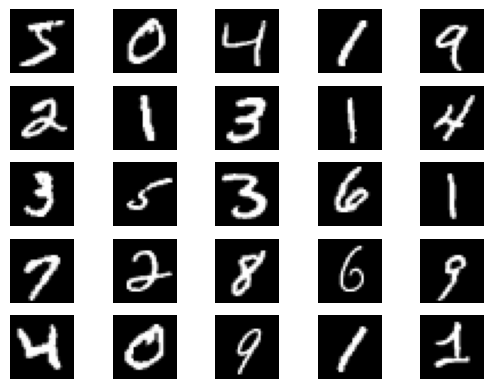

In [8]:
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(x_train.values[i].reshape(28, 28), cmap='gray')
    plt.axis('off')
plt.show()

In [16]:
# https://keras.io/getting_started/intro_to_keras_for_engineers/

#(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

x_train shape: (60000, 784)
y_train shape: (60000,)
60000 train samples
10000 test samples


In [17]:
num_classes = 10
input_shape = (784,)

model = keras.Sequential([
        keras.layers.Input(shape=input_shape),
        keras.layers.Dense(100, activation="relu"),
        keras.layers.Dense(num_classes, activation="softmax"),
    ]
)
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

In [22]:
kkk = x_train.values
kkk.shape

(60000, 784)

In [23]:
x_train = x_train.values
y_train = y_train.values
#x_train = x_train.reshape(x_train.shape[0], 784)
print(x_train.shape)
print(y_train.shape)

(60000, 784)
(60000,)


In [24]:

callbacks = [
    #keras.callbacks.ModelCheckpoint(filepath="model_at_epoch_{epoch}.keras"),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=2),
]
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam')
history = model.fit(x_train, y_train, epochs=20, validation_split=0.2, callbacks=callbacks)


Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.5019 - val_loss: 0.1662
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 944us/step - loss: 0.1463 - val_loss: 0.1273
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 999us/step - loss: 0.0986 - val_loss: 0.1071
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 958us/step - loss: 0.0723 - val_loss: 0.1038
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 992us/step - loss: 0.0580 - val_loss: 0.0989
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 967us/step - loss: 0.0479 - val_loss: 0.0947
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 963us/step - loss: 0.0366 - val_loss: 0.1037
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 996us/step - loss: 0.0293 - val_loss: 0.0982


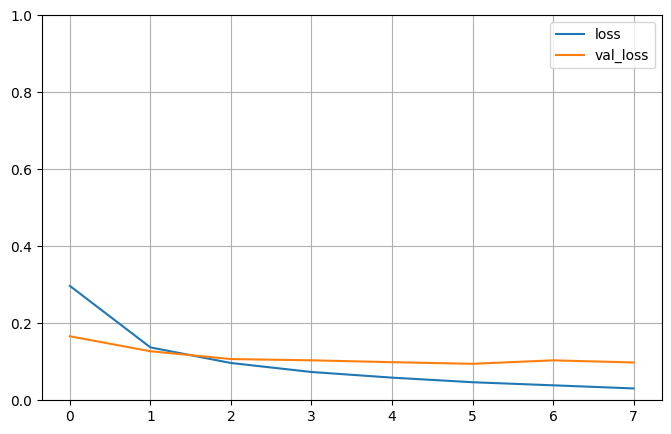

In [25]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [27]:
model.save('saved_mnistMLP.keras')
model = keras.saving.load_model('saved_mnistMLP.keras')

In [28]:
predictions = model.predict(x_test)
predictions[:2]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 757us/step


array([[3.78836296e-09, 8.80234163e-10, 5.42408486e-07, 1.35388291e-05,
        3.11606882e-12, 1.64736239e-10, 5.50620252e-17, 9.99985456e-01,
        7.69562405e-08, 3.89818041e-07],
       [1.11310770e-11, 1.99565347e-05, 9.99979734e-01, 1.44166947e-07,
        1.97380954e-14, 2.24426852e-10, 1.84694773e-10, 2.62754861e-16,
        1.10992545e-07, 9.77482480e-16]], dtype=float32)

In [29]:
predictions = [np.argmax(p) for p in predictions]
predictions[:2]

[np.int64(7), np.int64(2)]

In [30]:
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[ 966    0    2    0    1    1    3    3    2    2]
 [   0 1125    4    1    0    1    2    0    2    0]
 [   4    1 1008    3    1    0    2    2   10    1]
 [   0    0    8  991    0    0    0    5    4    2]
 [   1    0    1    1  960    0    6    1    1   11]
 [   3    4    0   26    2  843    5    1    5    3]
 [   2    3    2    1    5    2  942    0    1    0]
 [   0    3    9    7    2    0    0 1001    3    3]
 [   1    2    6   11    6    1    3    5  936    3]
 [   3    6    1    9   14    1    0   12    2  961]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.98      0.99      0.99      1135
           2       0.97      0.98      0.97      1032
           3       0.94      0.98      0.96      1010
           4       0.97      0.98      0.97       982
           5       0.99      0.95      0.97       892
           6       0.98      0.98      0.98       958
           7       0.97      0.97   

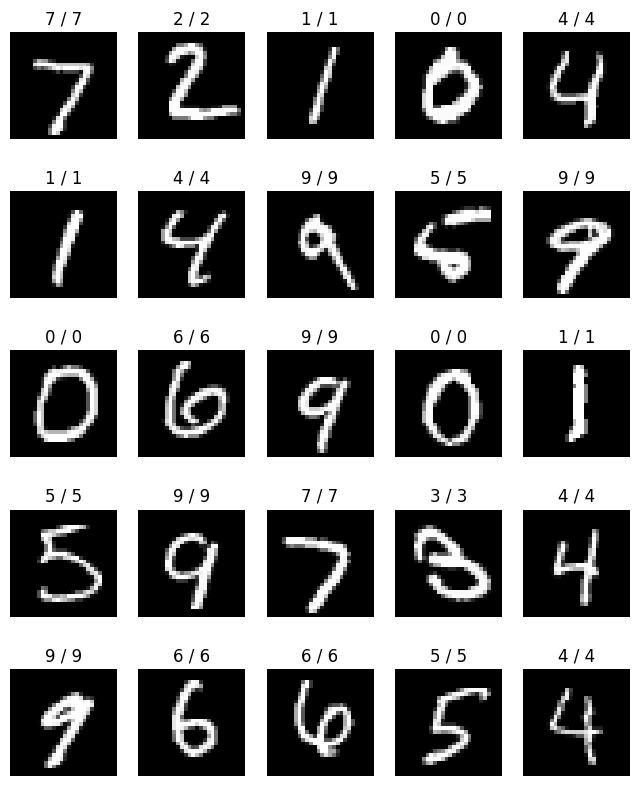

In [31]:
plt.figure(figsize=(8, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(x_test.values[i].reshape(28, 28), cmap='gray')
    plt.title(f'{y_test.values[i]} / {predictions[i]}')
    plt.axis('off')
plt.show()